### Importations

In [1]:
# Importations
import os 
import glob
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from compress_pickle import dump as cdump
from compress_pickle import load as cload

In [2]:
# Call from C++
import sys
import shutil
import signal
import subprocess/Users/minho/Documents/GitHub/Cell2FireML

SyntaxError: invalid syntax (12595219.py, line 5)

### Utils

In [ ]:
# Dict class [dict to object]
class Dict2Class(object):
    def __init__(self, my_dict):
        for key in my_dict:
            setattr(self, key, my_dict[key])

# Run FBP given input data to obtain HROS, BROS, and FROS
def run_fbp(fbp_path, args, verbose=False):
    execArray = [
        os.path.join(fbp_path, 'FBPDataGenerator'),
        '--input-data', args.InFolder + args.instance,
        '--nsims', args.NSims,
        '--verbose' if args(verbose) else '',
    ]
    
    # Verbose
    if verbose:
        print('ExecArray:', execArray)
    
    # Output Log
    if args.OutFolder is not None:
        if os.path.isdir(args.OutFolder) is False:
            os.makedirs(args.OutFolder)
        LogName = os.path.join(args.OutFolder, 'FBPDataGenerator_Output.csv')
    else:
        LogName = os.path.join(args.InFolder, 'FBPDataGenerator_Output.csv')
        
    # Perform the call 
    with open(LogName, 'w') as output:
        proc = subprocess.Popen(execArray, stdout=output)
        proc.communicate()
    return_code = proc.wait()
    if return_code != 0:
        raise RunTimeError(f'C++ returned {return_code}. \nTry looking at {LogName}.')
        
    # End data generator execution
    print('End of FBP DataGenerator execution...')

### Data sample

In [6]:
# Data 
BASE_PATH = ''
files = glob.glob(os.path.join(BASE_PATH, '*.csv'))
files

['Input_Data_C1.csv',
 'InputData_C1_baseline_BUI_99_FFMC_90_PS10.csv',
 'InputData_C1_baseline_BUI_99_FFMC_90_SAZ100.csv',
 'Data.csv',
 'InputData_C1_baseline_BUI_99_FFMC_90.csv',
 'Weather_1.csv',
 'InputData_C1_baseline_BUI_30.csv',
 'InputData_C1_baseline_BUI_0.csv',
 'InputData_C1_baseline_BUI_99_FFMC_90_PS50.csv',
 'InputData_C1_baseline_BUI_120.csv',
 'InputData_C1_baseline_BUI_99.csv',
 'Data_Dogrib.csv',
 'InputData_C1_baseline_BUI_60.csv',
 'InputData_C1_baseline_BUI_99_FFMC_45.csv',
 'InputData_C1_baseline.csv',
 'InputData_Test.csv',
 'InputData.csv',
 'InputData_C1_baseline_BUI_99_FFMC_90_SAZ50.csv',
 'Weather_Dogrib.csv',
 'InputData_C1_baseline_BUI_99_FFMC_90_SAZ270.csv']

In [13]:
# Load
df_data = pd.read_csv(files[0])
df_data_d = pd.read_csv(files[-2])
df_weather = pd.read_csv(files[1])
df_weather_d = pd.read_csv(files[-1])

#### Data

In [22]:
df_data.drop_duplicates().head().to_csv('InputData.csv', index=False)

In [9]:
df_data_d.head()

,fueltype,mon,jd,M,jd_min,lat,lon,elev,ffmc,ws,waz,bui,ps,saz,pc,pdf,gfl,cur,time,pattern
0,NF,NaN,NaN,NaN,NaN,51.621244,-115.608378,2298.0,NaN,NaN,NaN,NaN,43.0,7.0,NaN,NaN,NaN,NaN,20,NaN
1,NF,NaN,NaN,NaN,NaN,51.621244,-115.608378,2287.0,NaN,NaN,NaN,NaN,43.0,18.0,NaN,NaN,NaN,NaN,20,NaN
2,NF,NaN,NaN,NaN,NaN,51.621244,-115.608378,2274.0,NaN,NaN,NaN,NaN,41.0,26.0,NaN,NaN,NaN,NaN,20,NaN
3,NF,NaN,NaN,NaN,NaN,51.621244,-115.608378,2254.0,NaN,NaN,NaN,NaN,43.0,36.0,NaN,NaN,NaN,NaN,20,NaN
4,NF,NaN,NaN,NaN,NaN,51.621244,-115.608378,2224.0,NaN,NaN,NaN,NaN,45.0,40.0,NaN,NaN,NaN,NaN,20,NaN


In [24]:
df_data_d.drop_duplicates(subset=['fueltype']).reset_index(drop=True)

,fueltype,mon,jd,M,jd_min,lat,lon,elev,ffmc,ws,waz,bui,ps,saz,pc,pdf,gfl,cur,time,pattern
0,NF,NaN,NaN,NaN,NaN,51.621244,-115.608378,2298.0,NaN,NaN,NaN,NaN,43.0,7.0,NaN,NaN,NaN,NaN,20,NaN
1,O1a,NaN,NaN,NaN,NaN,51.621244,-115.608378,2332.0,NaN,NaN,NaN,NaN,28.0,42.0,NaN,NaN,0.35,60.0,20,NaN
2,C1,NaN,NaN,NaN,NaN,51.621244,-115.608378,2159.0,NaN,NaN,NaN,NaN,38.0,65.0,NaN,NaN,0.75,NaN,20,NaN
3,C2,NaN,NaN,NaN,NaN,51.621244,-115.608378,2118.0,NaN,NaN,NaN,NaN,17.0,313.0,NaN,NaN,0.80,NaN,20,NaN
4,C3,NaN,NaN,NaN,NaN,51.621244,-115.608378,2059.0,NaN,NaN,NaN,NaN,19.0,96.0,NaN,NaN,1.15,NaN,20,NaN
5,D1,NaN,NaN,NaN,NaN,51.621244,-115.608378,1409.0,NaN,NaN,NaN,NaN,11.0,126.0,NaN,NaN,NaN,NaN,20,NaN
6,M1,NaN,NaN,NaN,NaN,51.621244,-115.608378,1428.0,NaN,NaN,NaN,NaN,15.0,136.0,NaN,NaN,NaN,NaN,20,NaN
7,C7,NaN,NaN,NaN,NaN,51.621244,-115.608378,1486.0,NaN,NaN,NaN,NaN,10.0,191.0,NaN,NaN,1.20,NaN,20,NaN
8,C4,NaN,NaN,NaN,NaN,51.621244,-115.608378,1394.0,NaN,NaN,NaN,NaN,13.0,353.0,NaN,NaN,1.20,NaN,20,NaN
9,ND,NaN,NaN,NaN,NaN,51.621244,-115.608378,1480.0,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,20,NaN


#### Weather

In [6]:
df_weather.head()

,Scenario,datetime,APCP,TMP,RH,WS,WD,FFMC,DMC,DC,ISI,BUI,FWI
0,JCB,2001-10-16 13:00,0.0,17.7,20,21,0,90.5,64,535,13.4,99,37.9
1,JCB,2001-10-16 14:00,0.0,16.9,18,25,0,91.2,64,535,17.9,99,45.7
2,JCB,2001-10-16 15:00,0.0,16.1,20,27,0,91.8,64,535,21.7,99,51.7
3,JCB,2001-10-16 16:00,0.0,15.8,20,37,0,92.3,64,535,38.6,99,73.4
4,JCB,2001-10-16 17:00,0.0,13.9,25,43,0,92.9,64,535,54.6,99,90.0


In [14]:
df_weather_d.head()

,Scenario,datetime,APCP,TMP,RH,WS,WD,FFMC,DMC,DC,ISI,BUI,FWI
0,JCB,2001-10-16 13:00,0.0,17.7,20,21,235,90.5,64,535,13.4,99,37.9
1,JCB,2001-10-16 14:00,0.0,16.9,18,25,235,91.2,64,535,17.9,99,45.7
2,JCB,2001-10-16 15:00,0.0,16.1,20,27,235,91.8,64,535,21.7,99,51.7
3,JCB,2001-10-16 16:00,0.0,15.8,20,37,270,92.3,64,535,38.6,99,73.4
4,JCB,2001-10-16 17:00,0.0,13.9,25,43,270,92.9,64,535,54.6,99,90.0


### Main inputs
0. Fuel type [set of indexes]
1. Wind speed [WS, by 1 km/hr]
2. FFMC [0-101 or 85-99 intervals of 1 - Fine Fuel Moisture Code]
3. BUI [0-99 low to extreme by steps of 1 - Build Up Index]
4. ps [0 - 100%]
5. saz [0-360]

#### Fixed
1. Wind direction [WD = 0 fixed]
2. Temperature [TMP] -> extreme
3. Relative Humidity [RH] -> extreme
4. DMC [fixed = 64] -> extreme
5. DC [fixed = 535] -> extreme
6. ISI -> extreme
7. ACPC -> extreme
8. FWI -> extreme
9. elevation  (0, no particular effect)

In [4]:
# Data generator
def data_generator(FT=['C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'D1', 'D2', 'S1', 'S2', 'S3', 'O1a', 'O1b', 'M1', 'M2', 'M3', 'M4'],
                   WS=[0,100,1],
                   FFMC=[0,101,1],
                   BUI=[0,99,1],
                   ps=[0,100,1], 
                   saz=[0,360,1], 
                   specific_values=False):
    
    # Constants
    # Lat/lon
    lat = 51.621244
    lon = -115.608378
    time = 20
    
    # GFL dictionary
    GFLD = {"C1": 0.75, "C2": 0.8, "C3": 1.15, "C4": 1.2, "C5":1.2, "C6":1.2, "C7":1.2, 
            "D1": np.nan, "D2": np.nan, 
            "S1":np.nan, "S2": np.nan, "S3": np.nan, 
            "O1a":0.35, "O1b":0.35, 
            "M1": np.nan, "M2": np.nan, "M3":np.nan, "M4":np.nan, "NF":np.nan,
            "M1_5": 0.1, "M1_10": 0.2,  "M1_15": 0.3, "M1_20": 0.4, "M1_25": 0.5, "M1_30": 0.6, 
            "M1_35": 0.7, "M1_40": 0.8, "M1_45": 0.8, "M1_50": 0.8, "M1_55": 0.8, "M1_60": 0.8, 
            "M1_65": 1.0, "M1_70": 1.0, "M1_75": 1.0, "M1_80": 1.0, "M1_85": 1.0, "M1_90": 1.0, "M1_95": 1.0}
    
    # PDF dictionary
    PDFD ={"M3_5": 5,"M3_10": 10,"M3_15": 15,"M3_20": 20,"M3_25": 25,"M3_30": 30,"M3_35": 35,"M3_40": 40,"M3_45": 45,"M3_50": 50,
           "M3_55": 55,"M3_60": 60,"M3_65": 65,"M3_70": 70,"M3_75": 75,"M3_80": 80,"M3_85": 85,"M3_90": 90,"M3_95": 95,"M4_5": 5,
           "M4_10": 10,"M4_15": 15,"M4_20": 20,"M4_25": 25,"M4_30": 30,"M4_35": 35,"M4_40": 40,"M4_45": 45,"M4_50": 50,"M4_55": 55,
           "M4_60": 60,"M4_65": 65,"M4_70": 70,"M4_75": 75,"M4_80": 80,"M4_85": 85,"M4_90": 90,"M4_95": 95,"M3M4_5": 5,"M3M4_10": 10,
           "M3M4_15": 15,"M3M4_20": 20,"M3M4_25": 25,"M3M4_30": 30,"M3M4_35": 35,"M3M4_40": 40,"M3M4_45": 45,"M3M4_50": 50,"M3M4_55": 55,
           "M3M4_60": 60,"M3M4_65": 65,"M3M4_70": 70,"M3M4_75": 75,"M3M4_80": 80,"M3M4_85": 85,"M3M4_90": 90,"M3M4_95": 95}
    
    # PCD dictionary
    PCD = {"M1_5":5,"M1_10":10,"M1_15":15,"M1_20":20,"M1_25":25,"M1_30":30,"M1_35":35,"M1_40":40,"M1_45":45,
           "M1_50":50,"M1_55":55,"M1_60":60,"M1_65":65,"M1_70":70,"M1_75":75,"M1_80":80,"M1_85":85,"M1_90":90,
           "M1_95":95,"M2_5":5,"M2_10":10,"M2_15":15,"M2_20":20,"M2_25":25,"M2_30":30,"M2_35":35,"M2_40":40,
           "M2_45":45,"M2_50":50,"M2_55":55,"M2_60":60,"M2_65":65,"M2_70":70,"M2_75":75,"M2_80":80,"M2_85":85,
           "M2_90":90,"M2_95":95,"M1M2_5":5,"M1M2_10":10,"M1M2_15":15,"M1M2_20":20,"M1M2_25":25,"M1M2_30":30,
           "M1M2_35":35,"M1M2_40":40,"M1M2_45":45,"M1M2_50":50,"M1M2_55":55,"M1M2_60":60,"M1M2_65":65,"M1M2_70":70,
           "M1M2_75":75,"M1M2_80":80,"M1M2_85":85,"M1M2_90":90,"M1M2_95":95}
    
    # Create empty dataframe
    cols = ['fueltype', 'mon', 'jd', 'M', 'jd_min',	'lat', 'lon', 'elev', 'ffmc', 'ws',	'waz', 'bui', 'ps',	'saz', 'pc', 'pdf',	'gfl', 'cur', 'time', 'pattern']
    df_data = pd.DataFrame(columns=cols)
    
    # Mix
    print('Creating combinations...')
    if specific_values is False:
        ws = np.arange(WS[0], WS[1] + 1, WS[2])
        ffmc = np.arange(FFMC[0], FFMC[1] + FFMC[2], FFMC[2])
        bui = np.arange(BUI[0], BUI[1] + BUI[2], BUI[2])
        pss = np.arange(ps[0], ps[1] + ps[2], ps[2])
        sazs = np.arange(saz[0], saz[1] + saz[2], saz[2])
    else:
        ws = WS
        ffmc = FFMC
        bui = BUI
        pss = ps
        sazs = saz
    combinations = np.stack(np.meshgrid(FT, ws, ffmc, bui, pss, sazs), -1).reshape(-1, 6)    
    _aux = pd.DataFrame(combinations)
    _aux.columns = ['fueltype', 'ws', 'ffmc', 'bui', 'ps', 'saz']
    
    # Populating gfl
    for ft in GFLD.keys():
        _aux.loc[_aux['fueltype'] == ft, 'gfl'] = GFLD[ft]
    
    # Populate
    print('Populating final df...')
    df_data  = pd.concat([df_data, _aux], axis=0)
    df_data['lat'] = lat
    df_data['lon'] = lon
    df_data['time'] = time
    
    # Return generated dataset
    return df_data

In [5]:
import numpy as np
len(np.arange(0,80,5)), len(['C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'D1', 'D2', 'S1', 'S2', 'S3', 'O1a', 'O1b', 'M1', 'M2', 'M3', 'M4'])

(16, 18)

In [6]:
# Generate the data
df_datagen = data_generator(FT=['C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'D1', 'D2', 'S1', 'S2', 'S3', 'O1a', 'O1b', 'M1', 'M2', 'M3', 'M4'],
                            WS=np.arange(0,80,5),
                            FFMC=[40, 85, 89, 91, 95],
                            BUI=[10, 25, 45, 65, 99],
                            ps=[0, 25, 50, 75, 100],
                            saz=[0, 45, 90, 135, 180],
                            specific_values=True)
print('Dims:', df_datagen.shape)
df_datagen.head()

Creating combinations...
Populating final df...
Dims: (180000, 20)


,fueltype,mon,jd,M,jd_min,lat,lon,elev,ffmc,ws,waz,bui,ps,saz,pc,pdf,gfl,cur,time,pattern
0,C1,NaN,NaN,NaN,NaN,51.621244,-115.608378,NaN,40,0,NaN,10,0,0,NaN,NaN,0.75,NaN,20,NaN
1,C1,NaN,NaN,NaN,NaN,51.621244,-115.608378,NaN,40,0,NaN,10,0,45,NaN,NaN,0.75,NaN,20,NaN
2,C1,NaN,NaN,NaN,NaN,51.621244,-115.608378,NaN,40,0,NaN,10,0,90,NaN,NaN,0.75,NaN,20,NaN
3,C1,NaN,NaN,NaN,NaN,51.621244,-115.608378,NaN,40,0,NaN,10,0,135,NaN,NaN,0.75,NaN,20,NaN
4,C1,NaN,NaN,NaN,NaN,51.621244,-115.608378,NaN,40,0,NaN,10,0,180,NaN,NaN,0.75,NaN,20,NaN


In [73]:
df_datagen.to_csv('DataGenerated_Small.csv', index=False)

### Read output ROS
- Generated with FBP caller/wrapper (custom code created by CP) to output HROS,FROS,BROS to a table .txt given the previous inputs 

In [74]:
# Read
df_ros = pd.read_csv('DataGenerated_ROS_Small_Clean.csv', low_memory=False)
print('Dims:', df_ros.shape)
df_ros.head()

Dims: (180000, 3)


,HROS,FROS,BROS
0,6.966350e-11,6.966350e-11,6.966350e-11
1,6.966350e-11,6.966350e-11,6.966350e-11
2,6.966350e-11,6.966350e-11,6.966350e-11
3,6.966350e-11,6.966350e-11,6.966350e-11
4,6.966350e-11,6.966350e-11,6.966350e-11


In [75]:
# Merge inputs/outputs
df_train_data = pd.concat([df_datagen, df_ros], axis=1)
print('Original Dims:', df_train_data.shape)

# Take away NAN values for ROS (useless)
df_train_data.dropna(subset=['HROS'], inplace=True)
df_train_data.dropna(subset=['FROS'], inplace=True)
df_train_data.dropna(subset=['BROS'], inplace=True)
print('Dims:', df_train_data.shape)
df_train_data.head()

Original Dims: (180000, 23)
Dims: (180000, 23)


,fueltype,mon,jd,M,jd_min,lat,lon,elev,ffmc,ws,...,saz,pc,pdf,gfl,cur,time,pattern,HROS,FROS,BROS
0,C1,NaN,NaN,NaN,NaN,51.621244,-115.608378,NaN,40,0,...,0,NaN,NaN,0.75,NaN,20,NaN,6.966350e-11,6.966350e-11,6.966350e-11
1,C1,NaN,NaN,NaN,NaN,51.621244,-115.608378,NaN,40,0,...,45,NaN,NaN,0.75,NaN,20,NaN,6.966350e-11,6.966350e-11,6.966350e-11
2,C1,NaN,NaN,NaN,NaN,51.621244,-115.608378,NaN,40,0,...,90,NaN,NaN,0.75,NaN,20,NaN,6.966350e-11,6.966350e-11,6.966350e-11
3,C1,NaN,NaN,NaN,NaN,51.621244,-115.608378,NaN,40,0,...,135,NaN,NaN,0.75,NaN,20,NaN,6.966350e-11,6.966350e-11,6.966350e-11
4,C1,NaN,NaN,NaN,NaN,51.621244,-115.608378,NaN,40,0,...,180,NaN,NaN,0.75,NaN,20,NaN,6.966350e-11,6.966350e-11,6.966350e-11


In [76]:
df_train_data.to_csv('training_data_small_08202023.csv', index=False)

- https://www.sasquatchstation.com/Fire_Weather.php#:~:text=The%20BUI%20scale%20starts%20at,00%20%2D%204%3A00%20pm.
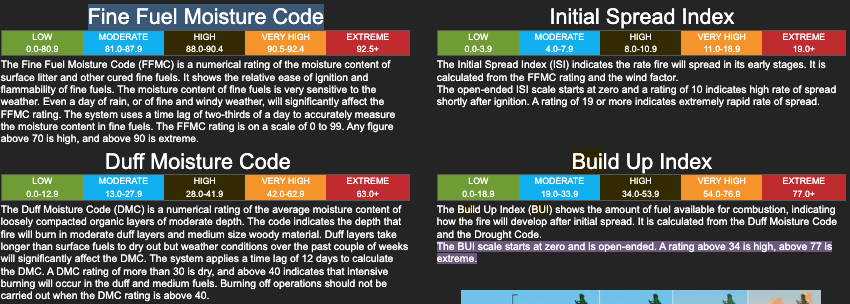

In [18]:
os.getcwd()

'/home/cristobal/src/C2FML/fbp'

In [ ]:
# Paths
FBP_DATA_GEN_PATH = '/home/cristobal/src/C2FML/fbp/datagen/'

# Data inputs/outputs
FBP_DATA_INPUT_PATH = '/home/cristobal/src/C2FML/fbp/datagen/inputs'
FBP_DATA_OUTPUT_PATH = '/home/cristobal/src/C2FML/fbp/datagen/outputs'
instance_name = '08102023'

# Arguments
args = {
    'InFolder': FBP_DATA_INPUT_PATH + instance_name + '/',
    'OutFolder': FBP_DATA_OUTPUT_PATH + instance_name + '/',
    'verbose': False,
}

# Dict to object
args_obj = Dict2Class(args)